## Grid points generator

Having two geolocations (two pairs of latitude and longitude) the function calculates more points in the area between them. 

Attribute `density` defines to how many pieces the distance between two adjacent points should be divided. 

* 1 returns a single square with 4 points. 
* 2 returns 9 points (4 corners, 4 in the middle of sides of the square, 1 in the center)
* 10 returns 100 points

In [1]:
import csv

def gen_grid_points(filename, n_parts, min_lat, min_long, max_lat, max_long):
    lat_step = (max_lat - min_lat) / n_parts
    long_step = (max_long - min_long) / n_parts
    with open('../input/{}_grid.csv'.format(filename), 'w') as csvfile:
        w = csv.writer(csvfile)
        w.writerow(['latitude', 'longitude'])
        for i in range(n_parts + 1):
            for j in range(n_parts + 1):
                lat = min_lat + lat_step * i
                lon = min_long + long_step * j
                w.writerow([lat, lon])


## Example grid boxes

Add your own ones and assign to 'box' the one you would like to use.

In [2]:
"""
Gmina Łomianki, Poland
52.357160, 20.836311

Otwock, Poland
52.097868, 21.283317
"""
example_box_1 = {
    'label': 'warsaw',
    'min_long': 20.836311,
    'max_long': 21.283317, 
    'min_lat': 52.097868, 
    'max_lat': 52.357160, 
    'density': 2
}

"""
Baltic Sea: 54.912432, 14.231228
Rozhnyativs'kyi district, Ukraine: 48.948987, 24.074978
"""
example_box_2 = {
    'label': 'poland',
    'min_long': 14.231228,
    'max_long': 24.074978, 
    'min_lat': 48.948987, 
    'max_lat': 54.912432, 
    'density': 20
}

""" Left-bottom corner: Upper Bay, 40.701429, -74.020730
    Top-right corner: East River, 40.764387, -73.949662
"""
example_box_3 = {
    'label': 'manhattan',
    'min_lat': 40.701429,
    'max_lat': 40.764387, 
    'min_long': -73.949662, 
    'max_long': -74.020730, 
    'density': 3
}

box = example_box_3

In [3]:
gen_grid_points(box['label'], box['density'], box['min_lat'], box['min_long'], box['max_lat'], box['max_long'])

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("max_columns", None)

In [5]:
listings = pd.read_csv("../input/{}_grid.csv".format(box['label']))

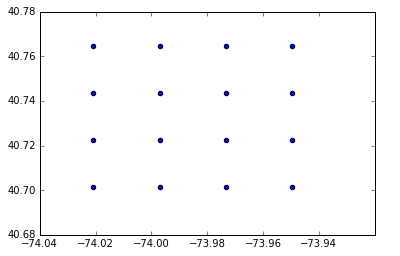

In [6]:
plt.scatter(listings['longitude'], listings['latitude'])

In [7]:
sample_len = len(listings)
sample = listings.sample(sample_len)

In [8]:
import mplleaflet
import matplotlib

plt.scatter(sample['longitude'], sample['latitude'])


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

mplleaflet.display(fig)

In [9]:
import json
import requests

locations = {}


for _, p in listings.iterrows():
    r = requests.get('https://www.starbucks.com/bff/locations?lat={}&lng={}'.format(p['latitude'], p['longitude']))
    if r.status_code == 200:
        l = json.loads(r.text)
        for store in l['stores']:
            locations[store['id']] = store
        print(r.status_code, len(l['stores']), len(locations), p['latitude'], p['longitude'])



200 50 50 40.701429 -73.949662
200 50 64 40.701429 -73.9733513333
200 50 70 40.701429 -73.9970406667
200 50 76 40.701429 -74.02073
200 50 105 40.722415 -73.949662
200 50 114 40.722415 -73.9733513333
200 50 115 40.722415 -73.9970406667
200 50 118 40.722415 -74.02073
200 50 145 40.743401 -73.949662
200 50 155 40.743401 -73.9733513333
200 50 173 40.743401 -73.9970406667
200 50 177 40.743401 -74.02073
200 50 201 40.764387 -73.949662
200 50 223 40.764387 -73.9733513333
200 50 238 40.764387 -73.9970406667
200 50 239 40.764387 -74.02073


In [10]:
with open('../input/{}_locations.csv'.format(box['label']), 'w') as csvfile:
    w = csv.writer(csvfile)
    w.writerow(['id', 'latitude', 'longitude'])
    for key, store in locations.items():
        w.writerow([store['id'], store['coordinates']['latitude'], store['coordinates']['longitude']])

In [11]:
listings = pd.read_csv("../input/{}_locations.csv".format(box['label']))

In [12]:
print(len(listings))

239


In [13]:
sample_len = len(listings)
sample = listings.sample(sample_len)

plt.scatter(sample['longitude'], sample['latitude'])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

mplleaflet.display(fig)